# P-Median Problem for Drone Stations

This notebook is based on [this spopt tutorial](https://github.com/pysal/spopt/blob/main/notebooks/p-median.ipynb).

*Authors:* [Huanfa Chen](https://github.com/huanfachen)

Hakimi (1965) proposed this model thinking about locating telephone switching centers. Then the objective was to minimize the total length of wire serving all customers while locating $p$ telephone witching centers, assuming that each customer would be connected by wire to the closest switching center.

_Locate a fixed number of facilities such that the resulting sum of travel distances is minimized_

**P-Median can be written as:**

$\begin{array} \displaystyle \textbf{Minimize} & \sum_{i}\sum_{j}{a_i d_{ij} z_{ij}} &&& (1) \\
\displaystyle \textbf{Subject to:} & \sum_{j}{z_{ij} = 1} & \forall i && (2) \\
            & \sum_{j}{z_{jj} = p} &&& (3) \\
            & z_{ij} \leq z_{jj} & \forall i,j & i\neq{j} & (4) \\
            & z_{ij} \in \{0,1\} & \forall i,j && (5) \\ \end{array}$

$\begin{array} \displaystyle \textbf{Where:}\\ & & \displaystyle i & \small = & \textrm{index referencing nodes of the network as demand} \\
& & j & \small = & \textrm{index referencing nodes of the network as potential facility sites} \\
& & d_{ij} & \small = & \textrm{shortest distance or travel time between nodes} i \textrm{and} j \\
& & p & \small = & \textrm{number of facilities to be located} \\
& & a_i & \small = & \textrm{service load or population demand at } i \\
& & z_{ij} & \small = & \begin{cases}
              1, \textrm{if demand } i \textrm{ is assigned to facility} j \\
              0, \textrm{otherwise}
           \end{cases} \\
& & z_{jj} & \small = & \begin{cases}
              1, \textrm{if node } j \textrm{ has been selected for a facility and assigns to itself} \\
              0, \textrm{otherwise} \\
           \end{cases} \\ 
\end{array}$

_This excerpt above was quoted from Church L., Murray, A. (2018)_

This tutorial solves P-Median using `spopt.locate.PMedian` instance for the drone stations.

## Import packages

In [1]:
import spopt
from spopt.locate import PMedian
from spopt.locate.util import simulated_geo_points

import numpy as np
import pandas as pd
import geopandas as gpd
import pulp
import spaghetti
from shapely.geometry import Point
import matplotlib.pyplot as plt
# custom utilities function
import utilities
# reload utilities to get the latest updates
from importlib import reload
reload(utilities)

from matplotlib.patches import Patch
import matplotlib.lines as mlines

/home/huanfa/miniconda3/envs/sds2021/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# test pulp
import pulp
# pulp.pulpTestAll()

Solver <class 'pulp.apis.coin_api.PULP_CBC_CMD'> unavailable
Solver <class 'pulp.apis.cplex_api.CPLEX_DLL'> unavailable
Solver <class 'pulp.apis.cplex_api.CPLEX_CMD'> unavailable
Solver <class 'pulp.apis.cplex_api.CPLEX_PY'> unavailable
Solver <class 'pulp.apis.coin_api.COIN_CMD'> available
Solver <class 'pulp.apis.coin_api.COINMP_DLL'> unavailable
Solver <class 'pulp.apis.glpk_api.GLPK_CMD'> available
Solver <class 'pulp.apis.xpress_api.XPRESS'> unavailable
Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-26
No parameters matching '_test' found


...

Solver <class 'pulp.apis.gurobi_api.GUROBI'> available
Solver <class 'pulp.apis.gurobi_api.GUROBI_CMD'> available
Solver <class 'pulp.apis.glpk_api.PYGLPK'> unavailable
Solver <class 'pulp.apis.coin_api.YAPOSIB'> unavailable
Solver <class 'pulp.apis.choco_api.PULP_CHOCO_CMD'> unavailable
Solver <class 'pulp.apis.choco_api.CHOCO_CMD'> unavailable
Solver <class 'pulp.apis.mipcl_api.MIPCL_CMD'> unavailable
Solver <class 'pulp.apis.mosek_api.MOSEK'> unavailable
Solver <class 'pulp.apis.scip_api.SCIP_CMD'> unavailable
	 Testing invalid status
	 Testing continuous LP solution - export dict
	 Testing export dict for LP
	 Testing MIP solution


.

	 Testing maximize continuous LP solution


............

	 Testing continuous LP solution - export JSON
	 Testing continuous LP solution - export solver dict
	 Testing continuous LP solution - export solver JSON
	 Testing reading MPS files - binary variable, no constraint names
	 Testing reading MPS files - integer variable
	 Testing reading MPS files - maximize
	 Testing logPath argument
	 Testing makeDict general behavior
	 Testing makeDict default value behavior
	 Testing the availability of the function pulpTestAll
	 Testing zero subtraction
	 Testing inconsistent lp solution


......

	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint


......

	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing Long lines in LP
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective


.....

	 Testing MIP solution
	 Testing MIP solution
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem


.........

	 Testing an integer infeasible problem
	 Testing another integer infeasible problem
	 Testing column based modelling
	 Testing fractional constraints
	 Testing elastic constraints (no change)


.........

	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
	 Testing timeLimit argument
	 Testing invalid status
	 Testing continuous LP solution - export dict
	 Testing export dict for LP
	 Testing MIP solution
	 Testing maximize continuous LP solution


..................

	 Testing continuous LP solution - export JSON
	 Testing continuous LP solution - export solver dict
	 Testing continuous LP solution - export solver JSON
	 Testing reading MPS files - binary variable, no constraint names
	 Testing reading MPS files - integer variable
	 Testing reading MPS files - maximize
	 Testing makeDict general behavior
	 Testing makeDict default value behavior
	 Testing the availability of the function pulpTestAll
	 Testing zero subtraction
	 Testing inconsistent lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint


...........

	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP solution
	 Testing MIP solution
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem


.............

	 Testing an integer infeasible problem
	 Testing another integer infeasible problem
	 Testing column based modelling
	 Testing fractional constraints
	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
	 Testing timeLimit argument


............................../home/huanfa/miniconda3/envs/sds2021/lib/python3.9/site-packages/pulp/tests/test_pulp.py:325: UserWarning: CBC gives a wrong solution with warmStart.
  warnings.warn("CBC gives a wrong solution with warmStart.")
....................

	 Testing invalid status
	 Testing continuous LP solution - export dict
	 Testing export dict for LP
	 Testing MIP solution
	 Testing maximize continuous LP solution
	 Testing continuous LP solution - export JSON
	 Testing continuous LP solution - export solver dict
	 Testing continuous LP solution - export solver JSON
	 Testing reading MPS files - binary variable, no constraint names
	 Testing reading MPS files - integer variable
	 Testing reading MPS files - maximize
	 Testing logPath argument
	 Testing makeDict general behavior
	 Testing makeDict default value behavior
	 Testing the availability of the function pulpTestAll
	 Testing zero subtraction
	 Testing inconsistent lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing LpAffineExpression divi

....

	 Testing MIP solution
	 Testing maximize continuous LP solution
	 Testing continuous LP solution - export JSON
	 Testing continuous LP solution - export solver dict


..........

	 Testing continuous LP solution - export solver JSON
	 Testing reading MPS files - binary variable, no constraint names
	 Testing reading MPS files - integer variable
	 Testing reading MPS files - maximize
	 Testing logPath argument
	 Testing makeDict general behavior
	 Testing makeDict default value behavior
	 Testing the availability of the function pulpTestAll
	 Testing zero subtraction
	 Testing inconsistent lp solution


....

	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names


......

	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing LpAffineExpression divide


.../home/huanfa/miniconda3/envs/sds2021/lib/python3.9/site-packages/pulp/tests/test_pulp.py:325: UserWarning: CBC gives a wrong solution with warmStart.
  warnings.warn("CBC gives a wrong solution with warmStart.")
.

	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP solution
	 Testing MIP solution


./home/huanfa/miniconda3/envs/sds2021/lib/python3.9/site-packages/pulp/apis/gurobi_api.py:322: UserWarning: GUROBI_CMD does not allow a problem to be relaxed
  warnings.warn('GUROBI_CMD does not allow a problem to be relaxed')
...

	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem
	 Testing an integer infeasible problem


.......

	 Testing another integer infeasible problem
	 Testing column based modelling
	 Testing fractional constraints


....

	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)


............................

	 Testing timeLimit argument


.................
----------------------------------------------------------------------
Ran 231 tests in 4.471s

OK


In [3]:
solver = pulp.PULP_CBC_CMD()
print(solver)
solver_list = pulp.listSolvers(onlyAvailable=True)
print(solver_list)

['GLPK_CMD', 'GUROBI', 'GUROBI_CMD', 'COIN_CMD']


## Import data

In [4]:
# boundary
gdf_liverpool_hub_four = gpd.read_file("Liverpool_hub_four_neighbourhood.geojson")

In [5]:
# demand data
# read in street segments
gdf_street_segments = gpd.read_file("nkde_crime_Liverpool_hub_four.geojson")

In [6]:
# site data
gdf_sites = gpd.read_file("Sites_Liverpool_hub_four.geojson")

In [7]:
# Euclidean cost distance
file_Euclidean_distance = "distance_matrix_demand_site_Euclidean.csv"
Euclidean_cost_matrix = utilities.read_distance_matrix_as_np_array(file_Euclidean_distance)

In [8]:
# network cost distance
file_network_distance = "distance_matrix_demand_site_network.csv"
network_cost_matrix = utilities.read_distance_matrix_as_np_array(file_network_distance)

In [9]:
# 3D cost distance
file_3D_distance = "distance_matrix_demand_site_3D.csv"
threeD_cost_matrix = utilities.read_distance_matrix_as_np_array(file_3D_distance)

## Parameters

Since the model needs a distance cost matrix we should define some variables. In the comments, it's defined what these variables are for but solver. The solver, assigned below as `pulp.PULP_CBC_CMD`, is an interface to optimization solver developed by [COIN-OR](https://github.com/coin-or/Cbc). If you want to use another optimization interface as Gurobi or CPLEX see this [guide](https://coin-or.github.io/pulp/guides/how_to_configure_solvers.html) that explains how to achieve this.

In [10]:
DEMAND_COUNT = len(gdf_street_segments) # quantity demand points
FACILITY_COUNT = len(gdf_sites) # quantity supply points

P_FACILITIES = 10 # 10 drone stations to be located

# Random seeds for reproducibility
# CLIENT_SEED = 5 
# FACILITY_SEED = 6 

# solver = pulp.PULP_CBC_CMD(msg=True) # see solvers available in pulp reference
# solver = pulp.getSolver('GLPK_CMD')
solver = pulp.getSolver('GUROBI_CMD')

## Euclidean distance PMP

In [12]:
# Euclidean distance pmp
pmedian_Euclidean_distance = PMedian.from_cost_matrix(Euclidean_cost_matrix, gdf_street_segments.density.to_list(), p_facilities=P_FACILITIES)
pmedian_Euclidean_distance = pmedian_Euclidean_distance.solve(solver)
pmedian_Euclidean_distance.facility_client_array()

Set parameter Username
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2023-08-26
Using license file /home/huanfa/gurobi.lic

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Copyright (c) 2022, Gurobi Optimization, LLC

Read LP format model from file /tmp/f90a6f98f6054be19ef949b55cfe53c0-pulp.lp
Reading time = 0.28 seconds
objective_function: 160741 rows, 159123 columns, 477183 nonzeros
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 160741 rows, 159123 columns and 477183 nonzeros
Model fingerprint: 0x387fe090
Variable types: 0 continuous, 159123 integer (159123 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-07, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 2281.6455957
Presolve time: 0.68s
Presolved: 160741 rows, 159123 columns, 477183 nonzeros
Variable types: 0 conti

## Function for plotting the results

The cell below describe the plotting of the results. For each method from PMedian class (from_cost_matrix, from_geodataframe) there is a plot displaying the facility site that was selected with a star colored and the points covered with the same color. Sometimes the demand points will be colored with not expected colors, it represents the coverage overlapping.

In [13]:
dv_colors = [
    "darkcyan",
    "mediumseagreen",
    "cyan",
    "darkslategray",
    "lightskyblue",
    "limegreen",
    "darkgoldenrod",
    "peachpuff",
    "coral",
    "mediumvioletred",
    "blueviolet",
    "fuchsia",
    "thistle",
    "lavender",
    "saddlebrown",
] 

def plot_results(model, facility_points, demand_points, boundary):
    arr_points = []
    fac_sites = []
    
    for i in range(FACILITY_COUNT):
        if model.fac2cli[i]:
            fac_sites.append(i)

    fig, ax = plt.subplots(figsize=(6, 6))
    legend_elements = []

#     # plot streets
#     street.plot(ax=ax, alpha=1, color='black', zorder=1)
#     legend_elements.append(mlines.Line2D(
#         [],
#         [],
#         color='black',
#         label='streets',
#     ))

#     facility_points.plot(ax=ax, color='brown', marker="*", markersize=80, zorder=2)
#     legend_elements.append(mlines.Line2D(
#         [],
#         [],
#         color='brown',
#         marker="*",
#         linewidth=0,
#         label=f'facility sites ($n$={FACILITY_COUNT})'
#     ))

    # boundary
    boundary.plot(ax=ax, color='white', edgecolor='black')
    
    # demand points
    demand_points.plot(ax=ax, color='blue', edgecolor='white', alpha=0.3)
    label = f"Street segments"
    legend_elements.append(Patch(facecolor='blue', edgecolor="k", label=label))
    
    # unselected sites
    gdf_poi_unselected = facility_points[~facility_points.index.isin(fac_sites)]
    gdf_poi_unselected.plot(ax=ax, color='grey',marker="*",markersize=200 * 0.5,)
    label = f"Unselected sites"
#     legend_elements.append(Patch(marker="*",facecolor='grey', edgecolor="k", label=label))
    legend_elements.append(mlines.Line2D(
    [],
    [],
    color='grey',
    marker="*",
    ms=20 / 2,
    markeredgecolor="k",
    linewidth=0,
    alpha=0.8,
    label=label))
    
    # selected sites
    gdf_poi_selected = facility_points.iloc[fac_sites,]
    gdf_poi_selected.plot(ax=ax, color='red', marker="*",markersize=200 * 1.0,)
    label = f"Selected sites"
    legend_elements.append(mlines.Line2D(
    [],
    [],
    color='red',
    marker="*",
    ms=20 / 2,
    markeredgecolor="k",
    linewidth=0,
    alpha=0.8,
    label=label))
    

    
#     for i in range(len(arr_points)):
#         gdf = geopandas.GeoDataFrame(arr_points[i])

#         label = f"coverage_points by y{fac_sites[i]}"
#         legend_elements.append(Patch(facecolor=dv_colors[i], edgecolor="k", label=label))

#         gdf.plot(ax=ax, zorder=3, alpha=0.7, edgecolor="k", color=dv_colors[i], label=label)
#         facility_points.iloc[[fac_sites[i]]].plot(ax=ax,
#                                 marker="*",
#                                 markersize=200 * 3.0,
#                                 alpha=0.8,
#                                 zorder=4,
#                                 edgecolor="k",
#                                 facecolor=dv_colors[i])
        
#         legend_elements.append(mlines.Line2D(
#             [],
#             [],
#             color=dv_colors[i],
#             marker="*",
#             ms=20 / 2,
#             markeredgecolor="k",
#             linewidth=0,
#             alpha=0.8,
#             label=f"y{fac_sites[i]} facility selected",
#         ))

    plt.title("P-Median for drone stations", fontweight="bold")
    plt.legend(handles = legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

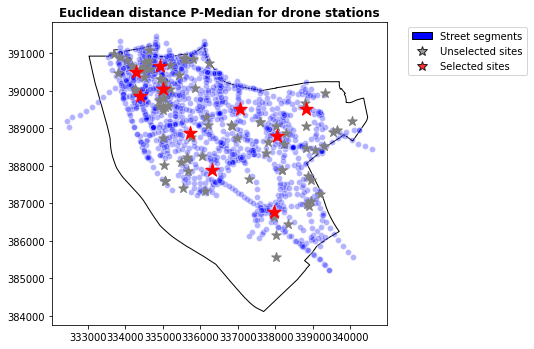

In [14]:
# plot Euclidean distance result
utilities.plot_pmp_results(pmedian_Euclidean_distance, facility_points=gdf_sites, demand_points=gdf_street_segments, boundary=gdf_liverpool_hub_four, plot_title='Euclidean distance P-Median for drone stations')
plt.show()

## Network distance PMP

In [15]:
# network distance pmp
pmedian_network_distance = PMedian.from_cost_matrix(network_cost_matrix, gdf_street_segments.density.to_list(), p_facilities=P_FACILITIES)
pmedian_network_distance = pmedian_network_distance.solve(solver)
pmedian_network_distance.facility_client_array()

Set parameter Username
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2023-08-26
Using license file /home/huanfa/gurobi.lic

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Copyright (c) 2022, Gurobi Optimization, LLC

Read LP format model from file /tmp/351673a58c834998b3883209e3aab573-pulp.lp
Reading time = 0.28 seconds
objective_function: 160741 rows, 159123 columns, 477183 nonzeros
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 160741 rows, 159123 columns and 477183 nonzeros
Model fingerprint: 0x39e2688e
Variable types: 0 continuous, 159123 integer (159123 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-08, 6e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 3013.9789786
Presolve time: 0.72s
Presolved: 160741 rows, 159123 columns, 477183 nonzeros
Variable types: 0 conti

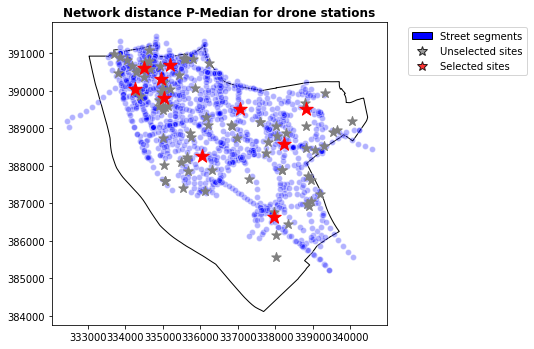

In [16]:
# plot
utilities.plot_pmp_results(pmedian_network_distance, facility_points=gdf_sites, demand_points=gdf_street_segments, boundary=gdf_liverpool_hub_four, plot_title='Network distance P-Median for drone stations')
plt.show()

## 3D distance PMP

In [17]:
# network distance pmp
pmedian_3D_distance = PMedian.from_cost_matrix(threeD_cost_matrix, gdf_street_segments.density.to_list(), p_facilities=P_FACILITIES)
pmedian_3D_distance = pmedian_3D_distance.solve(solver)
pmedian_3D_distance.facility_client_array()

Set parameter Username
Set parameter LogFile to value "gurobi.log"
Academic license - for non-commercial use only - expires 2023-08-26
Using license file /home/huanfa/gurobi.lic

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Copyright (c) 2022, Gurobi Optimization, LLC

Read LP format model from file /tmp/fcc04cd6e5dc47829b8e45bf4ad15b05-pulp.lp
Reading time = 0.27 seconds
objective_function: 160741 rows, 159123 columns, 477183 nonzeros
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 160741 rows, 159123 columns and 477183 nonzeros
Model fingerprint: 0x136835a7
Variable types: 0 continuous, 159123 integer (159123 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-07, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 2415.9066582
Presolve time: 0.68s
Presolved: 160741 rows, 159123 columns, 477183 nonzeros
Variable types: 0 conti

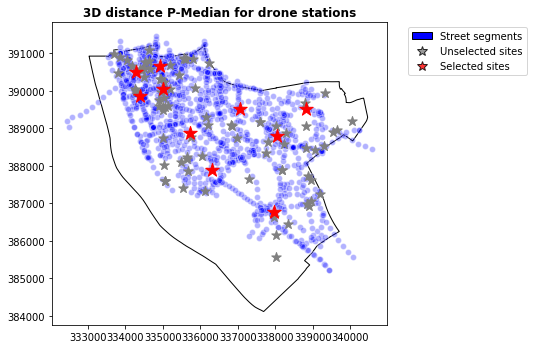

In [18]:
# plot
utilities.plot_pmp_results(pmedian_3D_distance, facility_points=gdf_sites, demand_points=gdf_street_segments, boundary=gdf_liverpool_hub_four, plot_title='3D distance P-Median for drone stations')
plt.show()

In [19]:
# compare the selected sites from Euclidean and 3D distance PMP
assert(pd.DataFrame.equals(utilities.get_selected_facility_sites(pmedian_Euclidean_distance, gdf_sites),
utilities.get_selected_facility_sites(pmedian_3D_distance, gdf_sites)))

## Comparisong of the pmp results

In [41]:
# test fac2cli
pmedian_Euclidean_distance.fac2cli[0]

[]

In [79]:
# transform PMedian.arr_cli2fac_val to an float array
array_cli2fac_lpvar = np.array(pmedian_Euclidean_distance.cli_assgn_vars)
print(array_cli2fac_lpvar.shape)
print(array_cli2fac_lpvar[0][0].value())
arr_cli2fac_val = np.zeros(array_cli2fac_lpvar.shape)
print(arr_cli2fac_val.shape)
for i in range(array_cli2fac_lpvar.shape[0]):
    for j in range(array_cli2fac_lpvar.shape[1]):
        arr_cli2fac_val[i][j] = array_cli2fac_lpvar[i][j].value()
np.sum(arr_cli2fac_val)

# to get the optimal objective value, multiply the cost matrix and the cli_assgn_vars matrix
obj_val = np.sum(np.multiply(pmedian_Euclidean_distance.aij, arr_cli2fac_val))
print(obj_val)
print(np.max(pmedian_Euclidean_distance.aij))
# aij is the product of the distance and weight of the client (or demand)
print(np.min(pmedian_Euclidean_distance.aij))

(1710, 93)
0.0
(1710, 93)
350.9369730622794
34.160141087081676
0.0


In [80]:
# summary of Euclidean_cost_matrix
np.max(Euclidean_cost_matrix)

8363.349912077383

350.9369730622794


In [ ]:
# TODO: write a function 

In [51]:
prod.sum()

KeyboardInterrupt: 

# The results below are not to be used

## Lattice 10x10

Create lattice 10x10 with 9 vertical lines in interior.

In [3]:
lattice = spaghetti.regular_lattice((0, 0, 10, 10), 9, exterior=True)
ntw = spaghetti.Network(in_data=lattice)

Transform spaghetti instance to geopandas geodataframe.

In [4]:
street = spaghetti.element_as_gdf(ntw, arcs=True)

street_buffered = geopandas.GeoDataFrame(
    geopandas.GeoSeries(street["geometry"].buffer(0.2).unary_union),
    crs=street.crs,
    columns=["geometry"],
)

Plotting the network created by spaghetti we can verify that it seems a district with quarters and streets.

<AxesSubplot:>

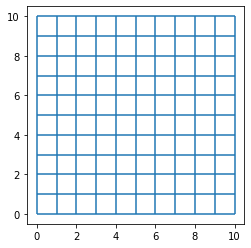

In [5]:
street.plot()

## Simulate points in a network

The function `simulated_geo_points` simulates points inside a network. In this case, it uses a lattice network 10x10 created by using spaghetti package.
Below we use the function defined above and simulate the points inside lattice bounds.

In [6]:
client_points = simulated_geo_points(street_buffered, needed=CLIENT_COUNT, seed=CLIENT_SEED)
facility_points = simulated_geo_points(
    street_buffered, needed=FACILITY_COUNT, seed=FACILITY_SEED
)

Plotting the 100 client and 5 facility points we can see that the function generates dummy points to an area of 10x10 which is the area created by our lattice created on previous cells.

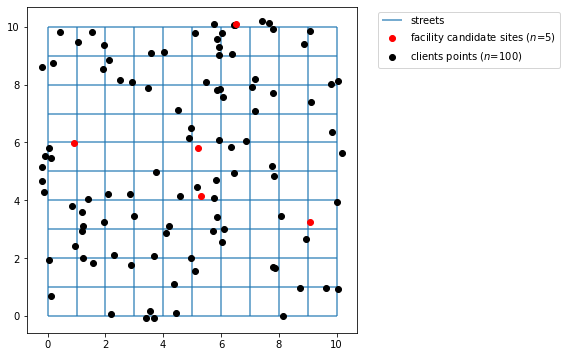

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
street.plot(ax=ax, alpha=0.8, zorder=1, label='streets')
facility_points.plot(ax=ax, color='red', zorder=2, label='facility candidate sites ($n$=5)')
client_points.plot(ax=ax, color='black', label='clients points ($n$=100)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

Here, for each client point the model suppose that there is a weight. So, we use randint function from numpy to also simulate these weights.

In [8]:
ai = numpy.random.randint(1, 12, CLIENT_COUNT)

The weight is simulate with a 1-12 range, the minimum is 1 and the maximum is 12.

In [9]:
ai

array([10,  7,  3,  6,  6,  2,  5,  6,  1,  3,  3,  4,  6, 10,  6,  3, 11,
        8,  9,  6,  7, 11, 11, 11,  4,  6,  2,  3,  4,  7, 10, 10,  9,  1,
       11,  4,  8,  5,  9,  2,  3,  5,  2,  6,  6,  7,  2, 10,  1,  6, 11,
        9, 10,  2,  3,  3, 10,  6, 11,  5,  2,  7,  4,  2,  5, 10,  9, 11,
       11, 11,  5,  7,  3, 10,  7,  3,  6,  3,  8,  6,  2,  2,  8,  6,  5,
        3,  9,  9,  8,  9,  1, 11,  9, 10,  3,  1,  8,  7,  1,  8])

## Transform simulated points to real points

To use cost matrix or geodataframes we have to pay attention in some details. The client and facility points simulated don't belong to network, so if we calculate the distances now we are supposed to receive a wrong result. Before calculating distances we snap points to the networok and then calculate the distances.

Below we snap points that is not spatially belong to network and create new real points geodataframes.

In [10]:
ntw.snapobservations(client_points, "clients", attribute=True)
clients_snapped = spaghetti.element_as_gdf(
    ntw, pp_name="clients", snapped=True
)

ntw.snapobservations(facility_points, "facilities", attribute=True)
facilities_snapped = spaghetti.element_as_gdf(
    ntw, pp_name="facilities", snapped=True
)

Now the plot seems more organized as the points belong to network. 
The network created is plotted below with facility points and clients points:

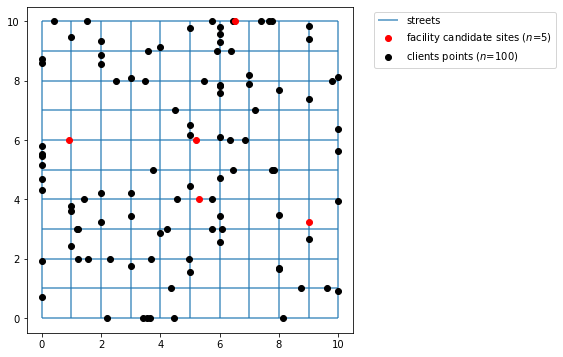

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
street.plot(ax=ax, alpha=0.8, zorder=1, label='streets')
facilities_snapped.plot(ax=ax, color='red', zorder=2, label='facility candidate sites ($n$=5)')
clients_snapped.plot(ax=ax, color='black', label='clients points ($n$=100)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

## Calculating the cost matrix 

Calculate distance between clients and facilities.

In [12]:
cost_matrix = ntw.allneighbordistances(
    sourcepattern=ntw.pointpatterns["clients"],
    destpattern=ntw.pointpatterns["facilities"],
)

The expected result here is a Dijkstra distance between clients and facilities points, so we our case an array 2D 100x5.

In [13]:
cost_matrix

array([[12.60302601,  3.93598651,  8.16571655,  6.04319467,  5.65607701],
       [13.10096347,  4.43392397,  8.66365401,  6.54113213,  5.15813955],
       [ 6.9095462 ,  4.2425067 ,  2.47223674,  0.34971486,  5.34955682],
       [ 2.98196832,  7.84581224,  3.45534114,  3.57786302,  6.25374871],
       [ 7.5002892 ,  6.32806975,  4.55779979,  6.43527791, 11.75939222],
       [ 0.60209077, 11.42987132,  5.03940023,  7.16192211,  9.8378078 ],
       [ 5.37335867,  6.20113923,  2.43086927,  4.30834738,  9.6324617 ],
       [ 5.40801577,  5.41976478,  3.02929369,  1.15181557,  4.85108725],
       [ 3.68807115,  8.51585171,  2.12538061,  4.24790249,  7.94717417],
       [14.22503627,  4.60274429,  9.78772681,  7.66520493,  4.98931924],
       [10.32521229,  4.99225179,  7.38272288,  9.260201  , 14.58431531],
       [ 6.65436171,  7.98732222,  5.59685112,  3.719373  ,  2.58135531],
       [11.55510375,  1.11193575,  7.11779429,  5.37988496, 10.70399927],
       [10.90832519,  1.75871431,  6.4

With ``PMedian.from_cost_matrix`` we model the PMedian problem to get the minimum distance sum between facility and a client with 4 faiclities available to place and we use the cost matrix calculated previously.

In [16]:
pmedian_from_cost_matrix = PMedian.from_cost_matrix(cost_matrix, ai, p_facilities=P_FACILITIES)
pmedian_from_cost_matrix = pmedian_from_cost_matrix.solve(solver)

Expected result is an instance of PMedian.

In [17]:
pmedian_from_cost_matrix

## Using GeoDataFrame

Assigning service load array to demand geodataframe 

In [19]:
clients_snapped['weights'] = ai

In [20]:
clients_snapped

,id,geometry,comp_label,weights
0,0,POINT (2.00000 8.85562),0,10
1,1,POINT (2.00000 9.35355),0,7
2,2,POINT (5.00000 6.16214),0,3
3,3,POINT (7.76544 5.00000),0,6
4,4,POINT (3.00000 1.75230),0,6
...,...,...,...,...
95,95,POINT (0.00000 4.30248),0,1
96,96,POINT (6.00000 3.42781),0,8
97,97,POINT (2.20274 0.00000),0,7
98,98,POINT (7.40431 10.00000),0,1


With ``PMedian.from_geodataframe`` we model the PMedian problem to get the minimum distance sum between facility and a client with 4 faiclities available to place using geodataframes without calculating the cost matrix previously.

In [21]:
pmedian_from_geodataframe = PMedian.from_geodataframe(
    clients_snapped, 
    facilities_snapped, 
    "geometry", 
    "geometry", 
    "weights", 
    p_facilities=P_FACILITIES,
    distance_metric="euclidean"
)
pmedian_from_geodataframe = pmedian_from_geodataframe.solve(solver)

Expected result is an instance of PMedian.

In [22]:
pmedian_from_geodataframe

## Plotting the results

The cell below describe the plotting of the results. For each method from PMedian class (from_cost_matrix, from_geodataframe) there is a plot displaying the facility site that was selected with a star colored and the points covered with the same color. Sometimes the demand points will be colored with not expected colors, it represents the coverage overlapping.

In [23]:
from matplotlib.patches import Patch
import matplotlib.lines as mlines

dv_colors = [
    "darkcyan",
    "mediumseagreen",
    "cyan",
    "darkslategray",
    "lightskyblue",
    "limegreen",
    "darkgoldenrod",
    "peachpuff",
    "coral",
    "mediumvioletred",
    "blueviolet",
    "fuchsia",
    "thistle",
    "lavender",
    "saddlebrown",
] 

def plot_results(model, facility_points):
    arr_points = []
    fac_sites = []
    
    for i in range(FACILITY_COUNT):
        if model.fac2cli[i]:

            geom = client_points.iloc[model.fac2cli[i]]['geometry']
            arr_points.append(geom)
            fac_sites.append(i)

    fig, ax = plt.subplots(figsize=(6, 6))
    legend_elements = []

    street.plot(ax=ax, alpha=1, color='black', zorder=1)
    legend_elements.append(mlines.Line2D(
        [],
        [],
        color='black',
        label='streets',
    ))

    facility_points.plot(ax=ax, color='brown', marker="*", markersize=80, zorder=2)
    legend_elements.append(mlines.Line2D(
        [],
        [],
        color='brown',
        marker="*",
        linewidth=0,
        label=f'facility sites ($n$={FACILITY_COUNT})'
    ))

    for i in range(len(arr_points)):
        gdf = geopandas.GeoDataFrame(arr_points[i])

        label = f"coverage_points by y{fac_sites[i]}"
        legend_elements.append(Patch(facecolor=dv_colors[i], edgecolor="k", label=label))

        gdf.plot(ax=ax, zorder=3, alpha=0.7, edgecolor="k", color=dv_colors[i], label=label)
        facility_points.iloc[[fac_sites[i]]].plot(ax=ax,
                                marker="*",
                                markersize=200 * 3.0,
                                alpha=0.8,
                                zorder=4,
                                edgecolor="k",
                                facecolor=dv_colors[i])
        
        legend_elements.append(mlines.Line2D(
            [],
            [],
            color=dv_colors[i],
            marker="*",
            ms=20 / 2,
            markeredgecolor="k",
            linewidth=0,
            alpha=0.8,
            label=f"y{fac_sites[i]} facility selected",
        ))

    plt.title("P-Median", fontweight="bold")
    plt.legend(handles = legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

### P-Median built from cost matrix

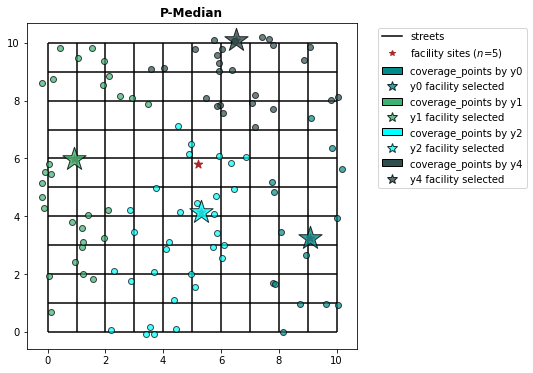

In [24]:
pmedian_from_cost_matrix.facility_client_array()
plot_results(pmedian_from_cost_matrix, facility_points)

### P-Median built from geodataframes

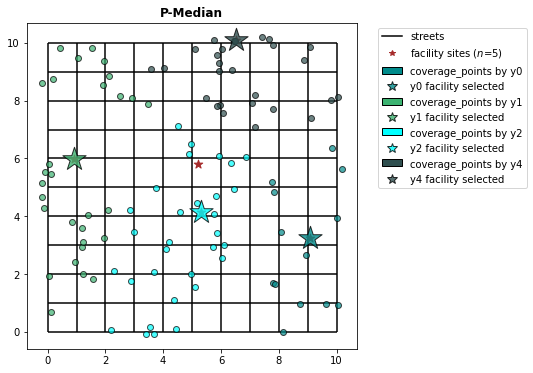

In [25]:
pmedian_from_geodataframe.facility_client_array()
plot_results(pmedian_from_geodataframe, facility_points)

## References

- [Hakimi, S. L. (1965). Optimum Distribution of Switching Centers in a Communication Network and Some Related Graph Theoretic Problems. Operations Research, 13(3), 462–475.](doi:10.1287/opre.13.3.462) 

- [Church, R. L., & Murray, A. T. (2018). Location covering models: History, applications and advancements (1st edition 2018). Springer](https://www.springer.com/gb/book/9783319998459)